In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
#import folium
#from folium import plugins

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('covid_19_india.csv', index_col='Date', parse_dates=True)

In [3]:
data.head()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-01-30,1,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,2,6:00 PM,Kerala,1,0,0,0,1
2020-01-02,3,6:00 PM,Kerala,2,0,0,0,2
2020-02-02,4,6:00 PM,Kerala,3,0,0,0,3
2020-03-02,5,6:00 PM,Kerala,3,0,0,0,3


In [4]:
data.drop(['Sno'],axis=1,inplace=True)


In [5]:
data.head()

,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,
2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2020-01-02,6:00 PM,Kerala,2,0,0,0,2
2020-02-02,6:00 PM,Kerala,3,0,0,0,3
2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 2020-01-30 to 2020-05-26
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Time                      2342 non-null   object
 1   State/UnionTerritory      2342 non-null   object
 2   ConfirmedIndianNational   2342 non-null   object
 3   ConfirmedForeignNational  2342 non-null   object
 4   Cured                     2342 non-null   int64 
 5   Deaths                    2342 non-null   int64 
 6   Confirmed                 2342 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 146.4+ KB


In [18]:
data['ConfirmedIndianNational'].value_counts()

-      1896
1       108
3        73
2        33
4        21
       ... 
24        1
121       1
101       1
71        1
86        1
Name: ConfirmedIndianNational, Length: 62, dtype: int64

In [19]:
data['ConfirmedIndianNational'] = data['ConfirmedIndianNational'].replace(['-'],0)
data['ConfirmedForeignNational'] = data['ConfirmedForeignNational'].replace(['-'],0)

In [20]:
data['ConfirmedIndianNational'].value_counts()

0      1896
1       108
3        73
2        33
4        21
       ... 
125       1
71        1
24        1
121       1
127       1
Name: ConfirmedIndianNational, Length: 62, dtype: int64

In [23]:
data['ConfirmedForeignNational'].value_counts()

0     1896
0      314
1       39
2       36
14      25
3       12
10       6
8        5
6        3
7        3
11       2
9        1
Name: ConfirmedForeignNational, dtype: int64

In [39]:
data['ConfirmedIndianNational'] = data['ConfirmedIndianNational'].astype('int64')
data['ConfirmedForeignNational'] = data['ConfirmedForeignNational'].astype('int64')


Time                        object
State/UnionTerritory        object
ConfirmedIndianNational      int64
ConfirmedForeignNational     int64
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [36]:
data['State/UnionTerritory'].value_counts()

Kerala                              118
Telengana                            86
Delhi                                86
Rajasthan                            85
Uttar Pradesh                        84
Haryana                              84
Ladakh                               81
Tamil Nadu                           81
Maharashtra                          79
Jammu and Kashmir                    79
Punjab                               79
Karnataka                            79
Andhra Pradesh                       76
Uttarakhand                          73
Odisha                               72
Puducherry                           70
West Bengal                          70
Chandigarh                           69
Chhattisgarh                         69
Gujarat                              68
Himachal Pradesh                     67
Madhya Pradesh                       67
Bihar                                66
Manipur                              64
Mizoram                              63


## DATA ANALYSIS

In [28]:
data.head()

,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,
2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2020-01-02,6:00 PM,Kerala,2,0,0,0,2
2020-02-02,6:00 PM,Kerala,3,0,0,0,3
2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [33]:
print("Maximum cases in a state:",max(data['State/UnionTerritory'].value_counts()))
print("Minimum cases in a state:",min(data['State/UnionTerritory'].value_counts()))

Maximum cases in a state: 118
Minimum cases in a state: 3


In [41]:
print("Total number of Indians Effected: ",data['ConfirmedIndianNational'].sum())
print("Total number of Foreign Effected: ",data['ConfirmedForeignNational'].sum())

Total number of Indians Effected:  5436
Total number of Foreign Effected:  667


In [44]:
print("Total number of cured cases till now: ",data['Cured'].sum())
print("Total number of death cases till now: ",data['Deaths'].sum())

Total number of cured cases till now:  837014
Total number of death cases till now:  79597


In [45]:
print("Total number of Confirmed cases till now: ",data['Confirmed'].sum())

Total number of Confirmed cases till now:  2538646


In [56]:
data['percent_Cured'] = (data['Cured']/data['Confirmed'])*100
print("Maximum percentage Cured in a day:",max(data['percent_Cured']))

Maximum percentage Cured in a day: 100.0


In [60]:
data['percent_Deaths'] = (data['Deaths']/data['Confirmed'])*100
print("Maximum percentage Deaths in a day:",max(data['percent_Deaths']))

Maximum percentage Deaths in a day: 50.0


## Data Visualization

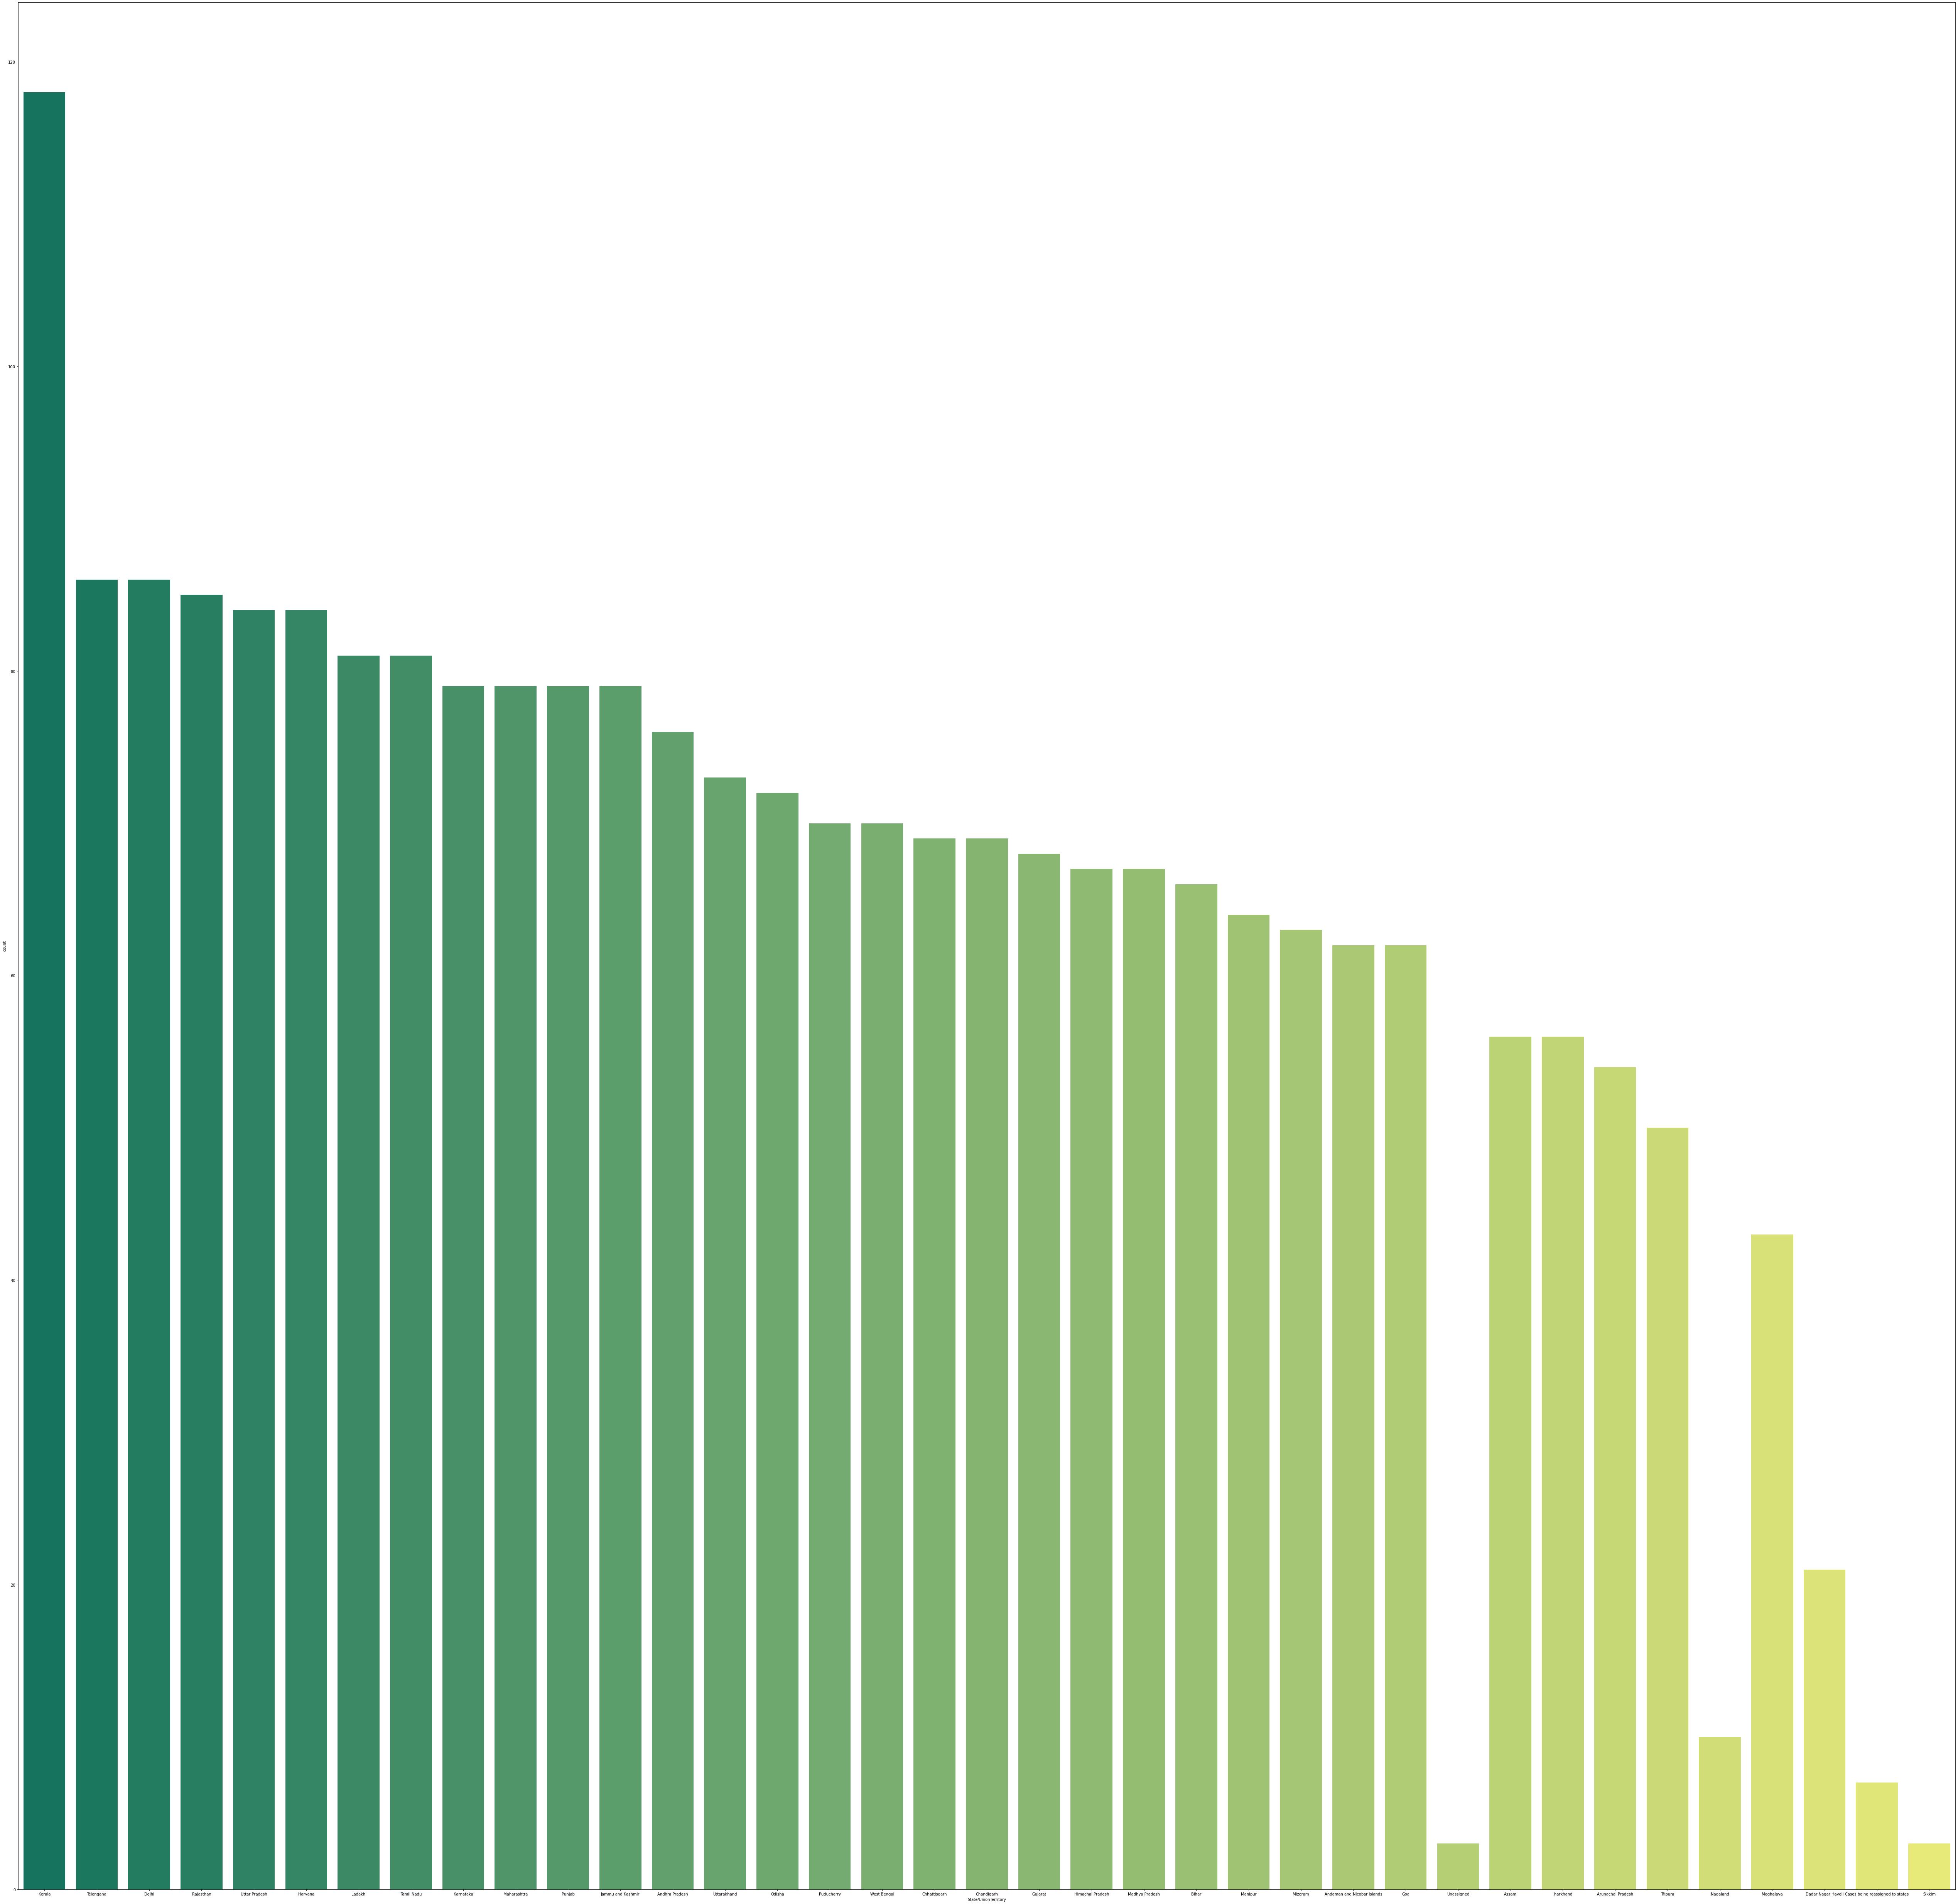

In [72]:
plt.figure(figsize=(90,90))
sns.countplot(x='State/UnionTerritory',data=data,palette='summer')

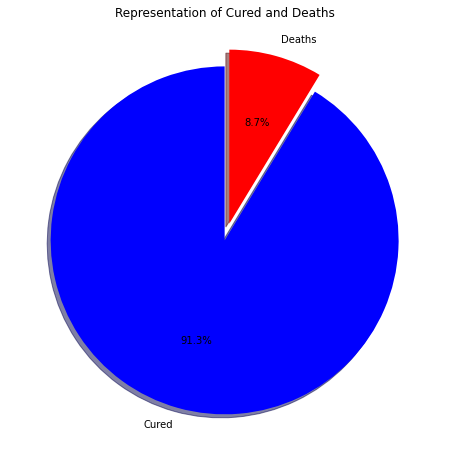

In [75]:
label = ['Cured','Deaths']
size = [data['Cured'].sum(),data['Deaths'].sum()]
colors = ["blue","red"]
explode = (0,0.1)
plt.figure(figsize=(10,8))
plt.pie(size,labels=label,explode=explode,colors=colors,autopct="%1.1f%%",shadow=True,startangle=90)
plt.title('Representation of Cured and Deaths')
plt.show()

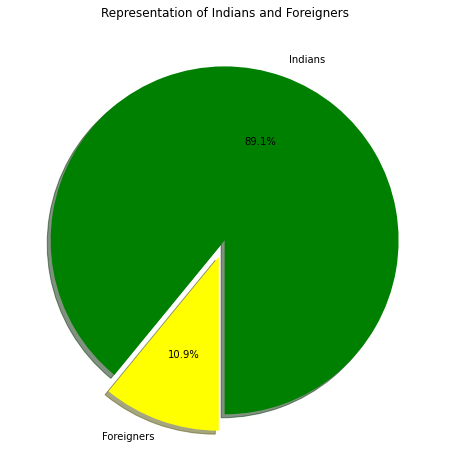

In [76]:
label = ['Indians','Foreigners']
size = [data['ConfirmedIndianNational'].sum(),data['ConfirmedForeignNational'].sum()]
colors = ["green","yellow"]
explode = (0,0.1)
plt.figure(figsize=(10,8))
plt.pie(size,labels=label,explode=explode,colors=colors,autopct="%1.1f%%",shadow=True,startangle=270)
plt.title('Representation of Indians and Foreigners')
plt.show()